In [1]:
from basicgeo import P2, P3
from wingshape import WingShape
from parapolygraph import ParamPolyGraph
import numpy, math

wingshape = WingShape("P7-211221-XYZ geometry.csv")        
print("Parametrization in uv: ", wingshape.urange, wingshape.vrange)
# approximately flat and in metres (based around section 7) without the compression at the leading edge    
#parapolygraph = ParamPolyGraph(wingshape, "segmentedwing.txt", deprecatedTrimFile=True)
#parapolygraph.saveas("test.json")
parapolygraph = ParamPolyGraph(wingshape, "test.json", splineweight=0.8, legsampleleng=0.05)


Parametrization in uv:  (0, 6.11206792886613) (-1.377293405726668, 1.377293405726668)


<IPython.core.display.Javascript object>


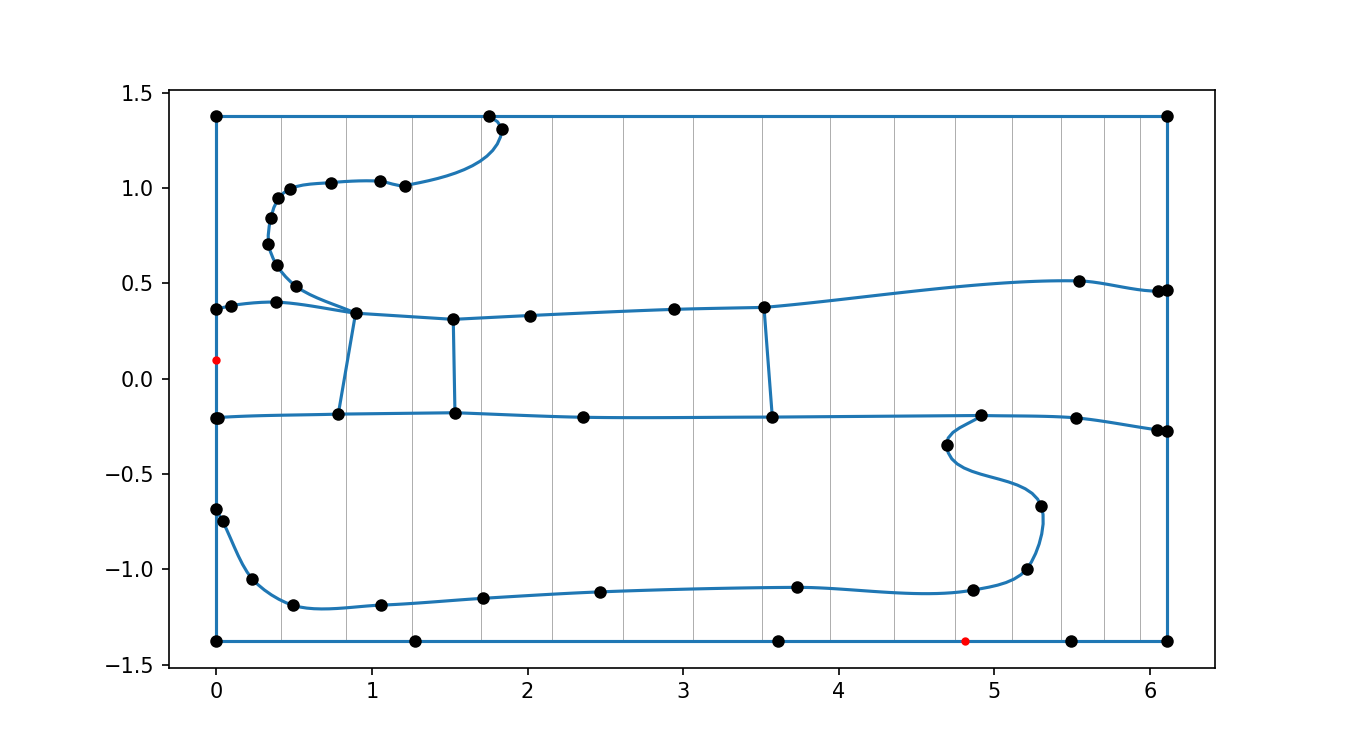

In [6]:
%matplotlib notebook

from matplotlib import pyplot as plt
import interactiveuvpara

# parapolygraph.splineweight =0.9

fig = plt.figure(figsize=(9,5))
interactiveuvpara.makeinteractivefigure(fig, parapolygraph)
plt.show()

In [3]:
parapolygraph.saveas("test.json")


In [10]:
parapolygraph.splineinterplegsdata()
polysnodes = parapolygraph.derivepolygons()
surfacemeshes = parapolygraph.surfacemesheslist(polysnodes, mesh_size=0.05)

freecadappimage = "/home/timbo/software/FreeCAD_0.19-24054-Linux-Conda_glibc2.12-x86_64.AppImage"
# fetch from: wget https://github.com/FreeCAD/FreeCAD/releases/download/0.19_pre/FreeCAD_0.19-24267-Linux-Conda_glibc2.12-x86_64.AppImage
freecadappimage = "freecad"   # nixos install

from parapolygraph import trimeshesflattener
trimeshesflattener(surfacemeshes, freecadappimage)


/nix/store/sr711v3q725xxiybwnlfx6167s1zhqy4-python3.9-numpy-1.21.2/lib/python3.9/site-packages/numpy/ctypeslib.py:518: RuntimeWarning: A builtin ctypes object gave a PEP3118 format string that does not match its itemsize, so a best-guess will be made of the data type. Newer versions of python may behave correctly.
  return asarray(obj)


>>> >>> >>> >>> >>> >>> >>> >>> >>> ... ... ... ... ... ... ... ... >>> >>> 
>>> 

[FreeCAD Console mode <Use Ctrl-D (i.e. EOF) to exit.>]
mesh (pts=1871, tris=3558) flattened
mesh (pts=5038, tris=9733) flattened
mesh (pts=1082, tris=2030) flattened
mesh (pts=511, tris=952) flattened
mesh (pts=434, tris=798) flattened
mesh (pts=914, tris=1657) flattened
mesh (pts=5682, tris=10989) flattened
mesh (pts=2841, tris=5224) flattened
[FreeCAD Console mode <Use Ctrl-D (i.e. EOF) to exit.>]



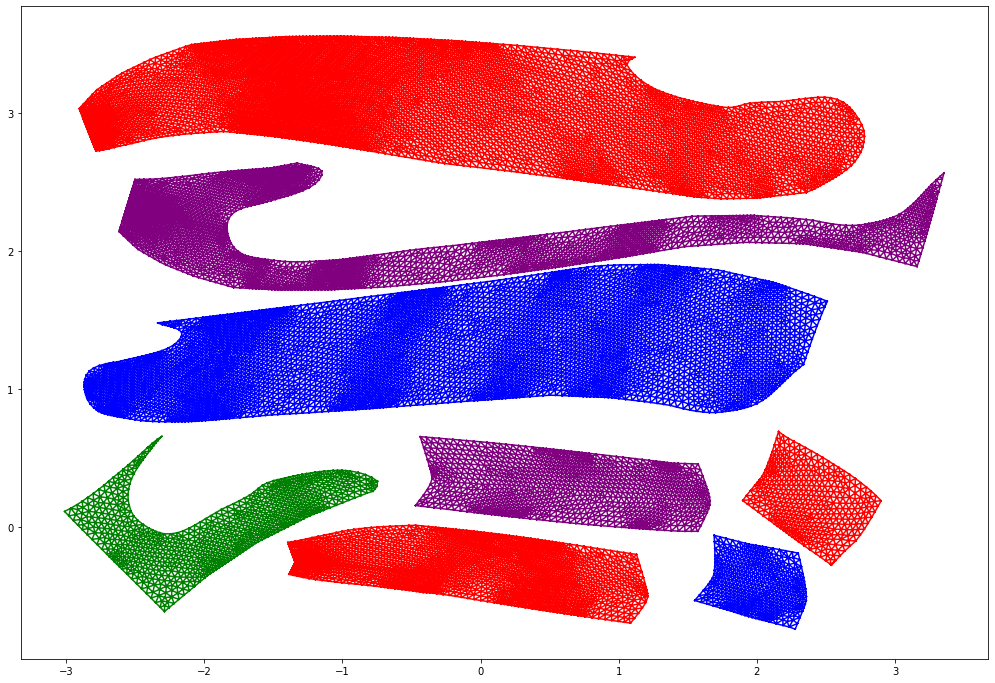

In [11]:
%matplotlib inline 

fig = plt.figure(figsize=(18,12))
coffsets = [(5, -2, 0, "green"), (1, 0, 1.3, "blue"), 
            (0, 0, -0.3, "red"), (2, 0.6, +0.3, "purple"),
            (3, 2, -0.4, "blue"), (4, 2.4, 0.2, "red"), 
            (6, 0, 3, "red"), (7, -0.2, 2.1, "purple")]
fax = fig.add_subplot()
for i, tx, ty, col in coffsets:
    surfacemesh = surfacemeshes[i]
    pts = surfacemesh["pts"]
    fpts = surfacemesh["fpts"]
    tris = surfacemesh["tris"]
    X = fpts[:,0]+tx
    Y = fpts[:,1]+ty
    fax.triplot(X, Y, tris, color=col)
fax.set_aspect("equal")
    

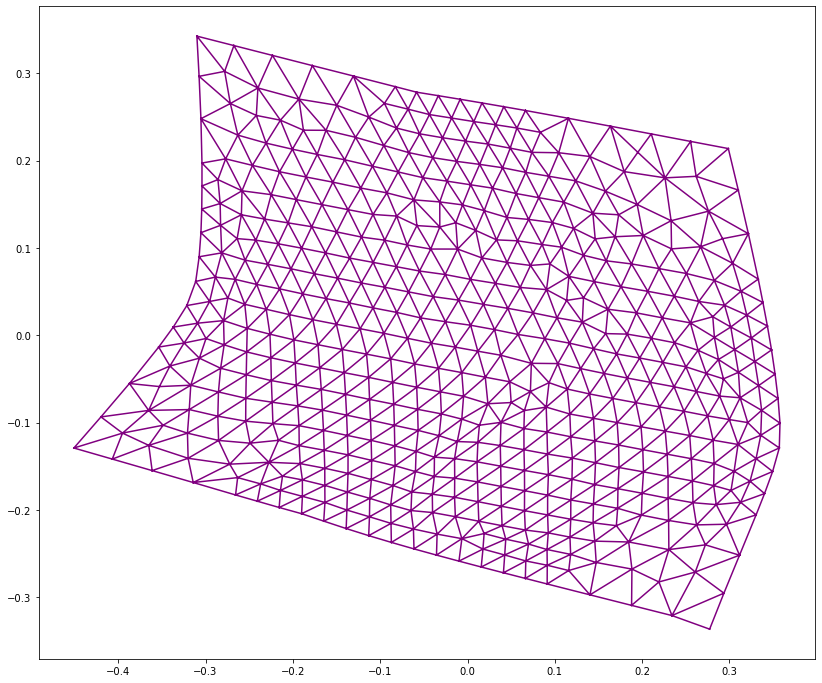

In [12]:
%matplotlib inline 

fig = plt.figure(figsize=(18,12))
fax = fig.add_subplot()
surfacemesh = surfacemeshes[3]
pts = surfacemesh["pts"]
fpts = surfacemesh["fpts"]
tris = surfacemesh["tris"]
X = fpts[:,0]
Y = fpts[:,1]
fax.triplot(X, Y, tris, color=col)
fax.set_aspect("equal")


<IPython.core.display.Javascript object>


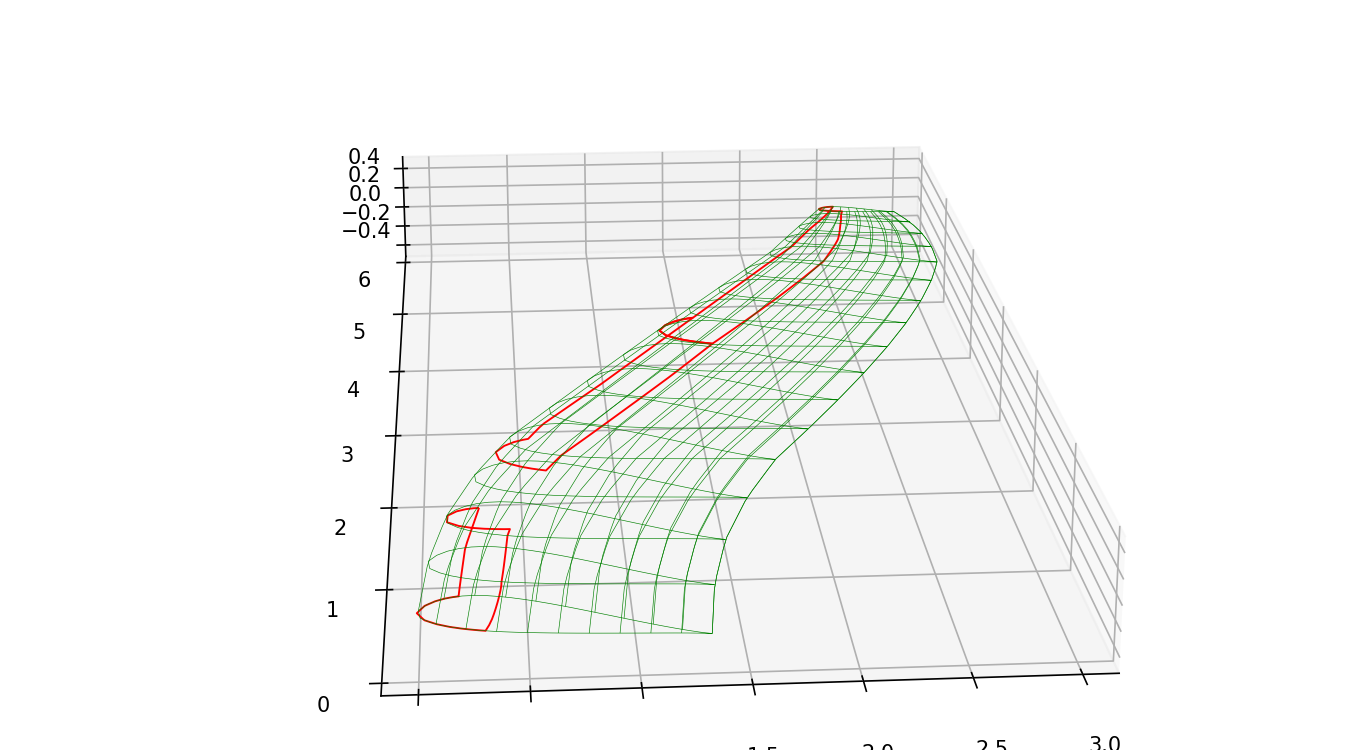

(0.0, 6.0)

In [4]:
%matplotlib notebook

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import numpy

def flipyz(p):
    return P3(p.x, p.z, p.y)

fig = plt.figure(figsize=(9,5))
ax3d = fig.add_subplot(1,1,1, projection='3d')
ax3d.set_box_aspect([1,2,0.2], zoom=2.3)

ax3d.add_collection(Line3DCollection(wingshape.linesegmentnetflipyz(flipyz), color="green", linewidth=0.3))
segpolys = [ ]
for k in [0, 4, 2]:
    polyloop = surfacemeshes[k]["polyloop"]
    segpolys.append([flipyz(wingshape.seval(p))  for p in polyloop])
    segpolys[-1].append(segpolys[-1][0])
lp3d = Line3DCollection(segpolys, color="red", linewidth=0.9)
ax3d.add_collection(lp3d)

ax3d.set_aspect('auto')
ax3d.set_clip_on(False)
ax3d.autoscale_view()
ax3d.set_xlim3d(-0.1, 3.1)
ax3d.set_zlim3d(-0.5, 0.5)
ax3d.set_ylim3d(0, 6)

<IPython.core.display.Javascript object>


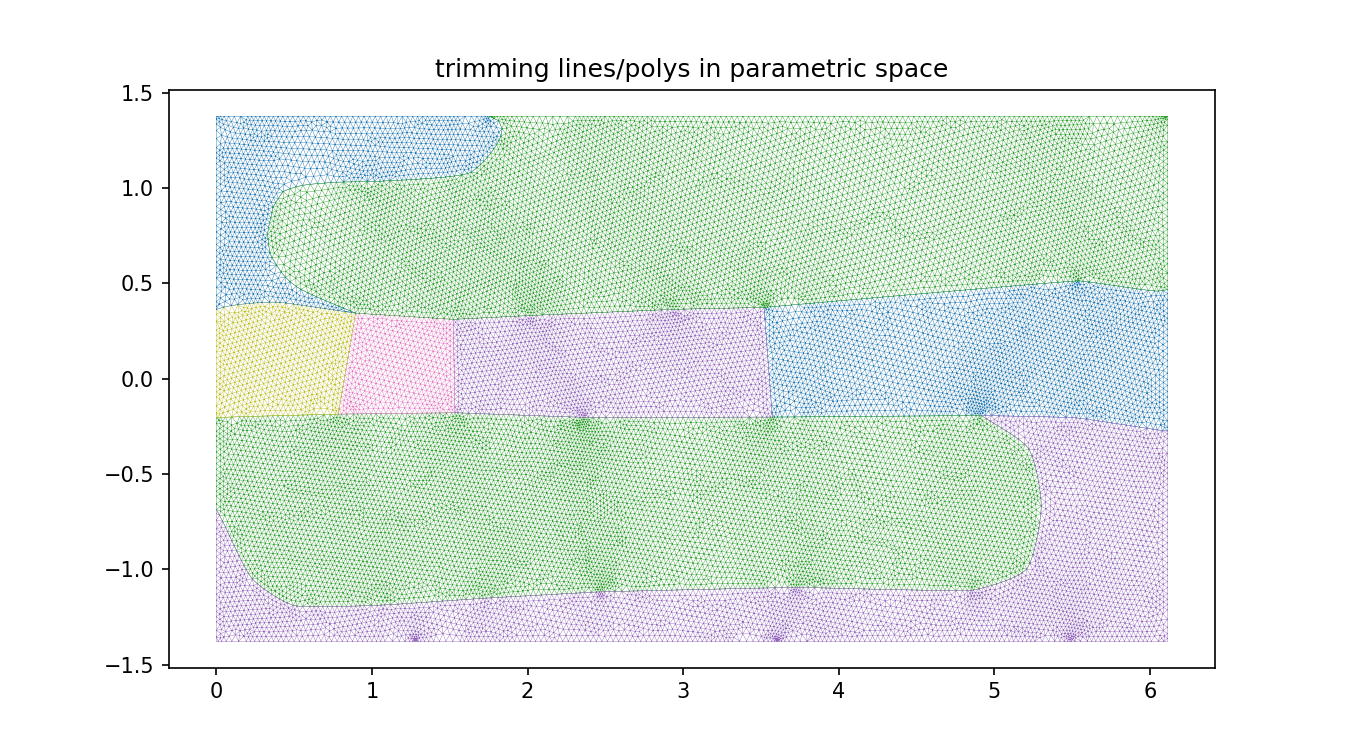

In [3]:
%matplotlib notebook

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection

import pygmsh, numpy

fig = plt.figure(figsize=(9,5))
for surfacemesh in surfacemeshes:
    uvpts = surfacemesh["uvpts"]
    plt.triplot(uvpts[:,0], uvpts[:,1], surfacemesh["tris"], linewidth=0.2)
plt.title("trimming lines/polys in parametric space");


<IPython.core.display.Javascript object>


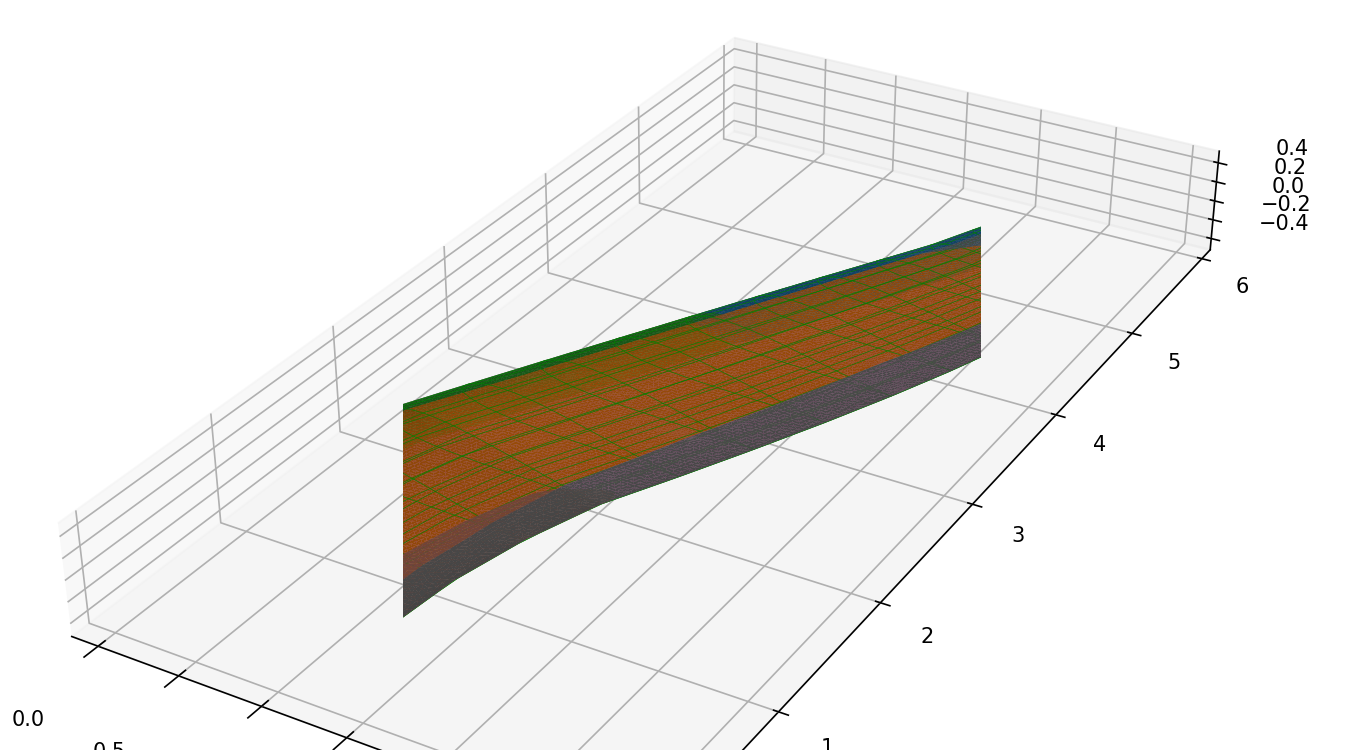

(0.0, 6.0)

In [7]:
%matplotlib notebook

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection

import numpy
fig = plt.figure(figsize=(9,5))

ax3d = fig.add_subplot(1,1,1, projection='3d')
ax3d.set_box_aspect([1,2,0.2], zoom=2.3)
ax3d.add_collection(Line3DCollection(wingshape.linesegmentnetflipyz(flipyz), color="green", linewidth=0.3))

for surfacemesh in surfacemeshes:
    pts = surfacemesh["pts"]
    ax3d.plot_trisurf(pts[:,0], pts[:,2], Z=pts[:,1], triangles=surfacemesh["tris"])

ax3d.set_aspect('auto')
ax3d.set_clip_on(False)
ax3d.autoscale_view()
ax3d.set_xlim3d(-0.1, 3.1)
ax3d.set_zlim3d(-0.5, 0.5)
ax3d.set_ylim3d(0, 6)

1013

In [4]:
freecadappimage = "/home/timbo/software/FreeCAD_0.19-24054-Linux-Conda_glibc2.12-x86_64.AppImage"
# fetch from: wget https://github.com/FreeCAD/FreeCAD/releases/download/0.19_pre/FreeCAD_0.19-24267-Linux-Conda_glibc2.12-x86_64.AppImage
freecadappimage = "freecad"   # nixos install

from parapolygraph import trimeshesflattener
trimeshesflattener(surfacemeshes, freecadappimage)


>>> >>> >>> >>> >>> >>> >>> >>> >>> ... ... ... ... ... ... ... ... >>> >>> 
>>> 

[FreeCAD Console mode <Use Ctrl-D (i.e. EOF) to exit.>]
mesh (pts=2367, tris=4530) flattened
mesh (pts=7343, tris=14308) flattened
mesh (pts=1705, tris=3246) flattened
mesh (pts=505, tris=930) flattened
mesh (pts=696, tris=1303) flattened
mesh (pts=1187, tris=2183) flattened
mesh (pts=6672, tris=12937) flattened
mesh (pts=3456, tris=6419) flattened
[FreeCAD Console mode <Use Ctrl-D (i.e. EOF) to exit.>]



<IPython.core.display.Javascript object>


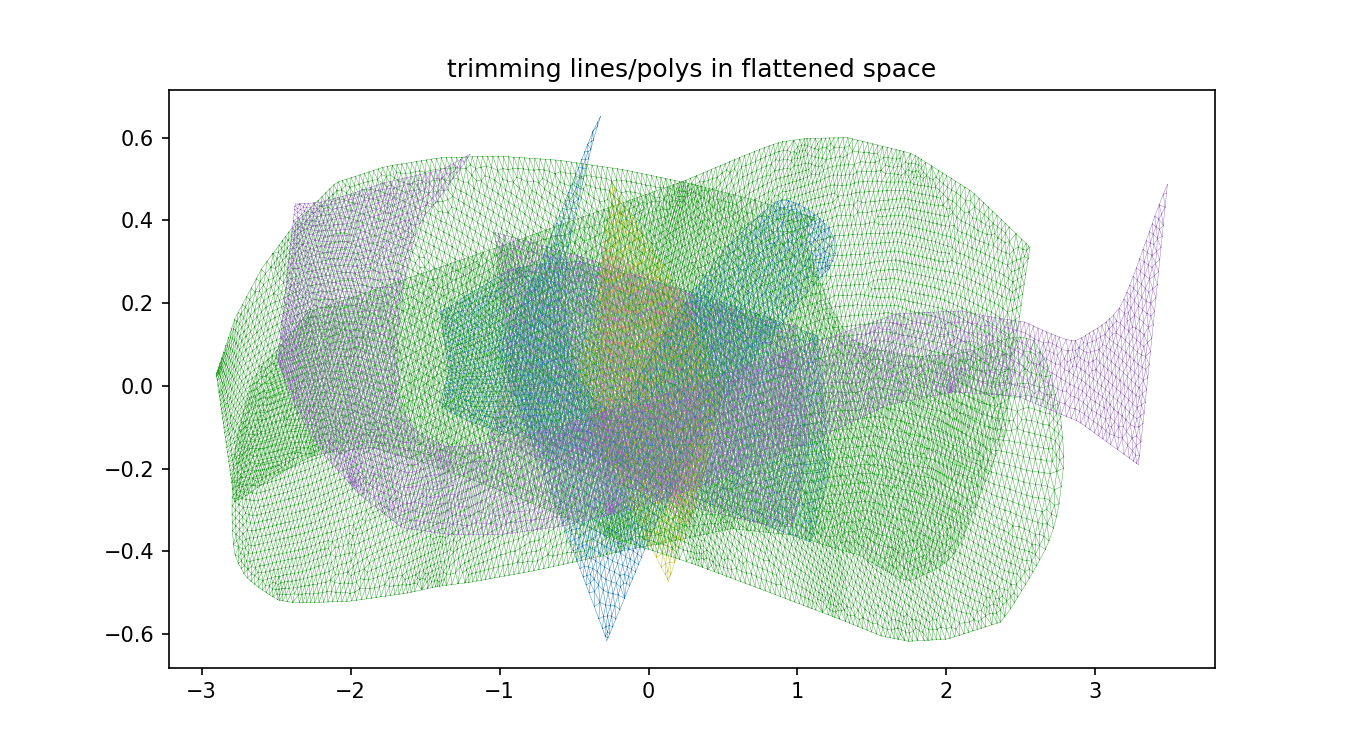

In [5]:
fig = plt.figure(figsize=(9,5))
for surfacemesh in surfacemeshes:
    uvpts = surfacemesh["uvpts"]
    fpts = surfacemesh["fpts"]
    #plt.triplot(uvpts[:,0], uvpts[:,1], surfacemesh["tris"], linewidth=0.2)
    plt.triplot(fpts[:,0], fpts[:,1], surfacemesh["tris"], linewidth=0.2)
    plt.title("trimming lines/polys in flattened space");


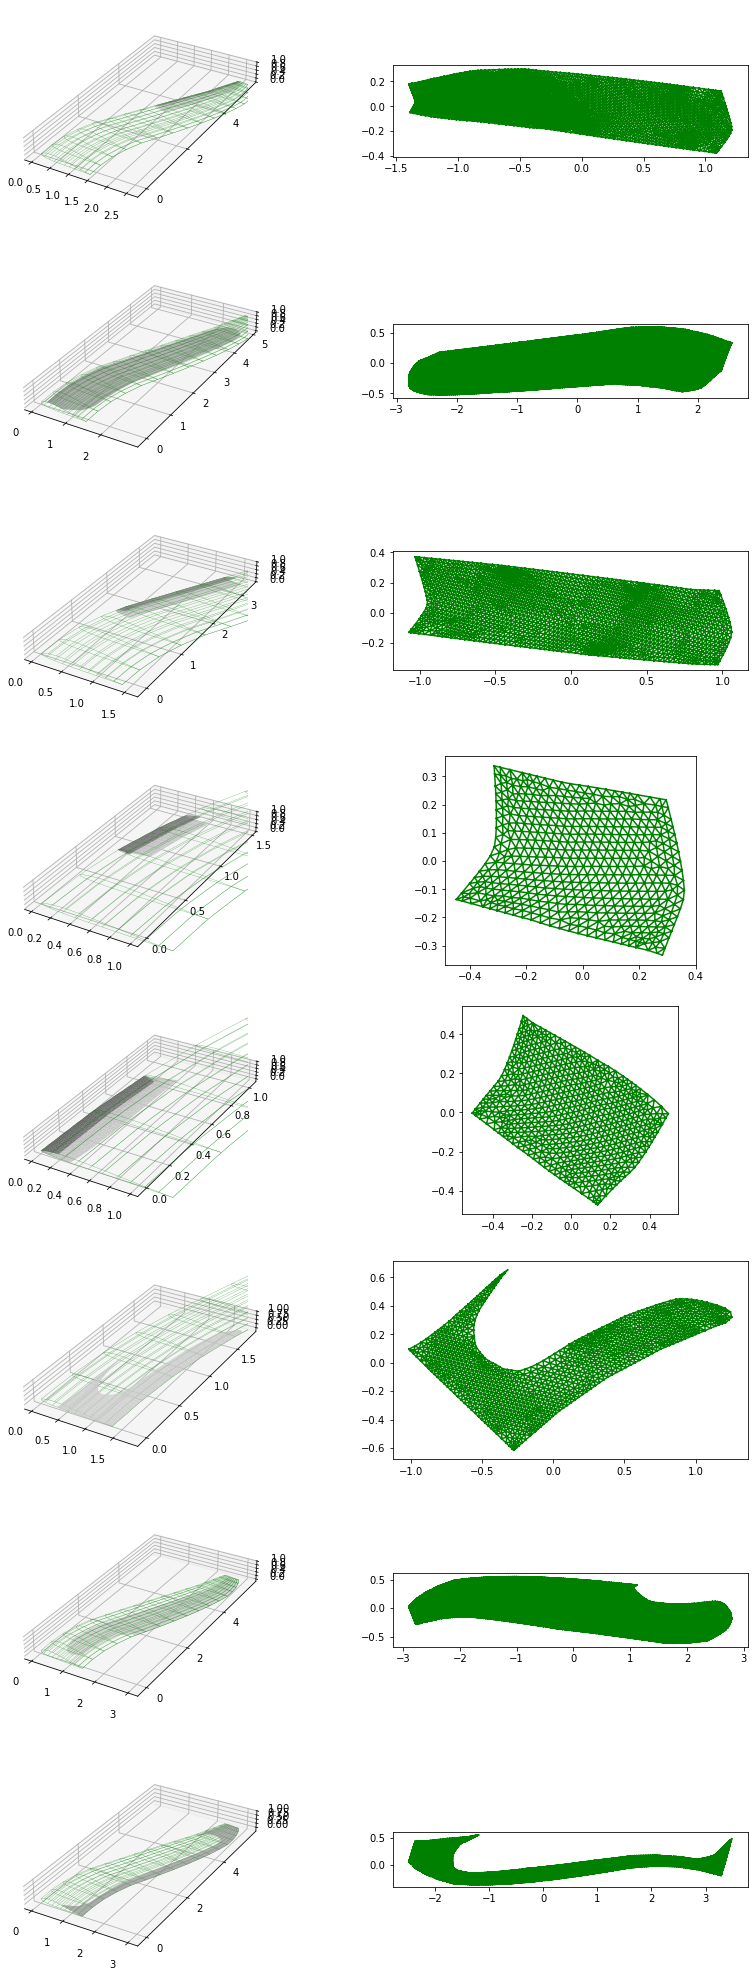

In [9]:
%matplotlib inline 

def fullflattriareas(surfacemesh):
    ptsP = [ P3(*p)  for p in surfacemesh["pts"] ]
    fptsP = [ P2(*p)  for p in surfacemesh["fpts"] ]
    tris = surfacemesh["tris"]

    def P2Cross(a, b):
        return a.u*b.v - b.u*a.v

    triareas = [ ]
    for tri in tris:
        p0, p1, p2 = ptsP[tri[0]], ptsP[tri[1]], ptsP[tri[2]]
        parea = 0.5*P3.Cross(p1 - p0, p2 - p0).Len()
        f0, f1, f2 = fptsP[tri[0]], fptsP[tri[1]], fptsP[tri[2]]
        farea = 0.5*abs(P2Cross(f1 - f0, f2 - f0))
        #areachange = farea/parea
        triareas.append([parea, farea])
    return numpy.array(triareas)

def flipyz(p):
    return P3(p.x, p.z, p.y)

fig = plt.figure(figsize=(14,36))

nrows = len(surfacemeshes)
for i in range(nrows):
    surfacemesh = surfacemeshes[i]
    pts = surfacemesh["pts"]
    fpts = surfacemesh["fpts"]
    tris = surfacemesh["tris"]
    ax = fig.add_subplot(nrows, 2, i*2+1, projection='3d')
    ax.set_box_aspect([1,2,0.2], zoom=1.3)
    ax.add_collection(Line3DCollection(wingshape.linesegmentnetflipyz(flipyz), color="green", linewidth=0.2))
    ax.plot_trisurf(pts[:,0], pts[:,2], Z=pts[:,1], triangles=tris, color="white")

    fax = fig.add_subplot(nrows, 2, i*2+2)
    X = fpts[:,0]
    Y = fpts[:,1]

    fax.triplot(X, Y, tris, color="green")
    fax.set_aspect("equal")
    triareas = fullflattriareas(surfacemesh)
    

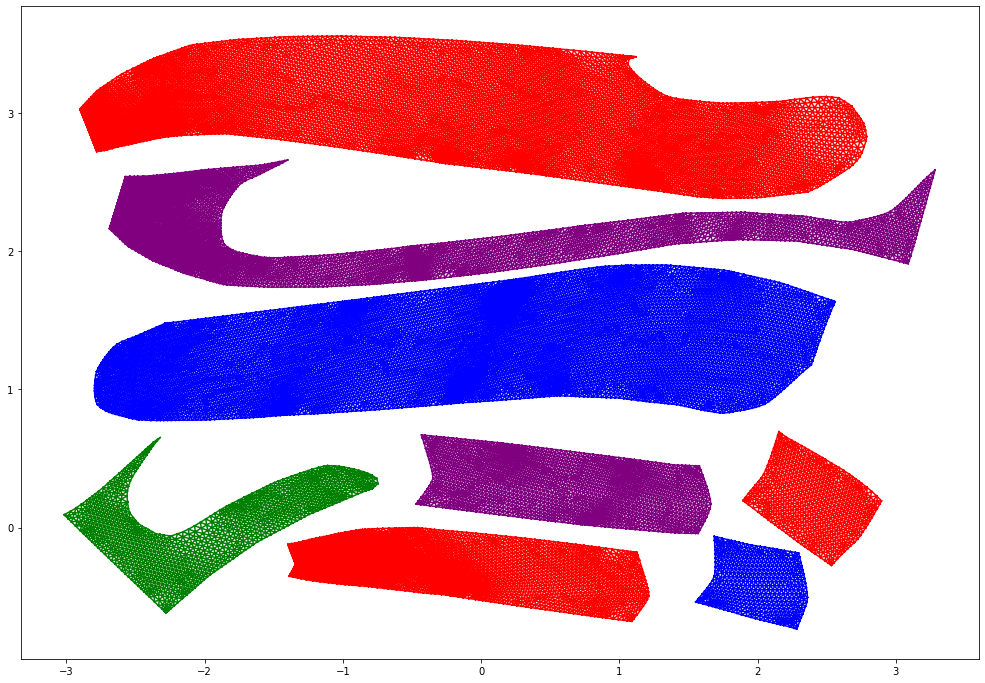

In [11]:
%matplotlib inline 

fig = plt.figure(figsize=(18,12))
coffsets = [(5, -2, 0, "green"), (1, 0, 1.3, "blue"), 
            (0, 0, -0.3, "red"), (2, 0.6, +0.3, "purple"),
            (3, 2, -0.4, "blue"), (4, 2.4, 0.2, "red"), 
            (6, 0, 3, "red"), (7, -0.2, 2.1, "purple")]
fax = fig.add_subplot()
for i, tx, ty, col in coffsets:
    surfacemesh = surfacemeshes[i]
    pts = surfacemesh["pts"]
    fpts = surfacemesh["fpts"]
    tris = surfacemesh["tris"]
    X = fpts[:,0]+tx
    Y = fpts[:,1]+ty
    fax.triplot(X, Y, tris, color=col)
    fax.set_aspect("equal")